In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("hourlyActivity_merged.xlsx")

In [3]:
df.head()

,ActivityHour,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake
0,2016-04-11 20:00:00,2026352035,0,0,0,0,0,0,11,1,0
1,2016-04-11 21:00:00,1927972279,0,0,0,0,0,0,4,0,0
2,2016-04-11 21:00:00,2026352035,0,0,0,0,0,0,44,15,1
3,2016-04-11 21:00:00,4020332650,0,0,0,0,0,0,36,4,3
4,2016-04-11 22:00:00,1927972279,0,0,0,0,0,0,60,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22458 entries, 0 to 22457
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ActivityHour  22458 non-null  datetime64[ns]
 1   Id            22458 non-null  int64         
 2   StepTotal     22458 non-null  int64         
 3   Calories      22458 non-null  int64         
 4   0=sedentary   22458 non-null  int64         
 5   1=light       22458 non-null  int64         
 6   2=moderate    22458 non-null  int64         
 7   3=veryactive  22458 non-null  int64         
 8   1=asleep      22458 non-null  int64         
 9   2=restless    22458 non-null  int64         
 10  3=awake       22458 non-null  int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 1.9 MB


In [5]:
df.describe()

,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake
count,2.245800e+04,22458.000000,22458.000000,22458.000000,22458.000000,22458.000000,22458.000000,22458.000000,22458.000000,22458.000000
mean,4.837186e+09,315.048357,95.829994,48.516831,7.874210,0.601879,0.901416,7.680114,0.624410,0.089857
std,2.422937e+09,686.019973,61.441794,15.899829,10.661898,3.043285,4.777443,18.911102,2.919676,0.928889
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,0.000000,62.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,33.500000,83.000000,56.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.962181e+09,349.000000,107.000000,60.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.877689e+09,10554.000000,948.000000,60.000000,60.000000,55.000000,60.000000,120.000000,53.000000,55.000000


* minutes of sleep and activity should sum to 60 across categories
* keeping all records to start

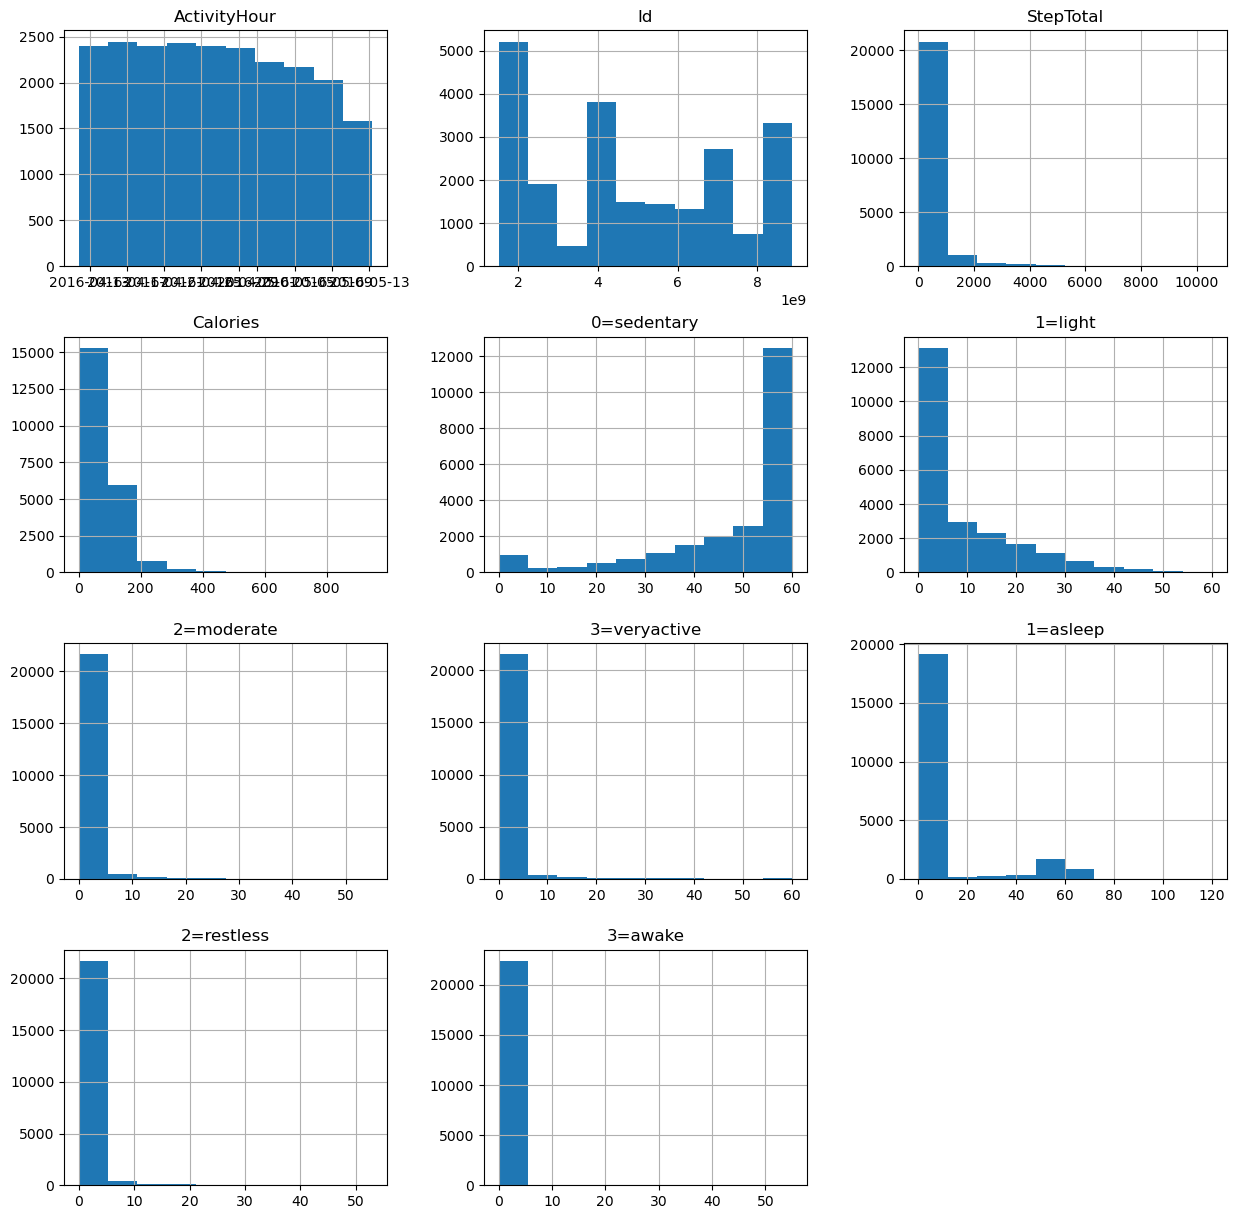

In [6]:
df.hist(figsize=(15,15))
plt.show()

In [7]:
df["Total Sleep Time"] = df["1=asleep"]+df["2=restless"]+df["3=awake"]

In [8]:
df[df["Total Sleep Time"]>=1].describe()

,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time
count,3.574000e+03,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000
mean,4.992143e+09,48.463067,70.393117,55.464186,2.121992,0.104085,0.100727,48.259653,3.923615,0.564633,52.747902
std,2.063450e+09,161.699166,25.605550,12.207265,4.656484,0.576933,1.107153,16.996180,6.374148,2.270447,15.775058
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.977334e+09,0.000000,55.000000,58.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,60.000000
50%,4.702922e+09,0.000000,68.000000,60.000000,0.000000,0.000000,0.000000,56.000000,2.000000,0.000000,60.000000
75%,6.962181e+09,17.000000,83.000000,60.000000,2.000000,0.000000,0.000000,59.000000,5.000000,0.000000,60.000000
max,8.792010e+09,4255.000000,476.000000,60.000000,40.000000,13.000000,32.000000,120.000000,53.000000,55.000000,120.000000


In [9]:
df["Total Exercise Time"] = df["0=sedentary"]+df["1=light"]+df["2=moderate"]+df["3=veryactive"]

In [10]:
df[df["Total Exercise Time"]>=1].describe()

,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time
count,2.164500e+04,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000
mean,4.836965e+09,315.152922,95.866436,50.339155,8.169970,0.624486,0.935274,7.669115,0.623423,0.090506,8.383045,60.068884
std,2.424088e+09,684.582611,61.381864,13.059941,10.748468,3.097637,4.863087,18.902644,2.918767,0.941156,20.289680,0.258499
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
25%,2.320127e+09,0.000000,62.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,4.445115e+09,33.000000,83.000000,57.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
75%,6.962181e+09,351.000000,107.000000,60.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,8.877689e+09,10554.000000,948.000000,60.000000,60.000000,55.000000,60.000000,120.000000,53.000000,55.000000,120.000000,63.000000


In [11]:
df[df["Id"]==2026352035]

,ActivityHour,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time
0,2016-04-11 20:00:00,2026352035,0,0,0,0,0,0,11,1,0,12,0
2,2016-04-11 21:00:00,2026352035,0,0,0,0,0,0,44,15,1,60,0
5,2016-04-11 22:00:00,2026352035,0,0,0,0,0,0,47,13,0,60,0
12,2016-04-11 23:00:00,2026352035,0,0,0,0,0,0,60,0,0,60,0
25,2016-04-12 00:00:00,2026352035,29,48,0,0,0,0,57,3,0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22412,2016-05-13 04:00:00,2026352035,0,0,60,0,0,0,0,0,0,0,60
22426,2016-05-13 05:00:00,2026352035,0,0,59,1,0,0,0,0,0,0,60
22438,2016-05-13 06:00:00,2026352035,0,0,43,17,0,0,0,0,0,0,60
22448,2016-05-13 07:00:00,2026352035,0,0,40,20,0,0,0,0,0,0,60


In [12]:
df["ActivityDate"] = pd.to_datetime(df["ActivityHour"]).dt.date

df.head()

,ActivityHour,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time,ActivityDate
0,2016-04-11 20:00:00,2026352035,0,0,0,0,0,0,11,1,0,12,0,2016-04-11
1,2016-04-11 21:00:00,1927972279,0,0,0,0,0,0,4,0,0,4,0,2016-04-11
2,2016-04-11 21:00:00,2026352035,0,0,0,0,0,0,44,15,1,60,0,2016-04-11
3,2016-04-11 21:00:00,4020332650,0,0,0,0,0,0,36,4,3,43,0,2016-04-11
4,2016-04-11 22:00:00,1927972279,0,0,0,0,0,0,60,0,0,60,0,2016-04-11


In [13]:
df["ActivityTime"] = pd.to_datetime(df["ActivityHour"]).dt.time

df.head()

,ActivityHour,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time,ActivityDate,ActivityTime
0,2016-04-11 20:00:00,2026352035,0,0,0,0,0,0,11,1,0,12,0,2016-04-11,20:00:00
1,2016-04-11 21:00:00,1927972279,0,0,0,0,0,0,4,0,0,4,0,2016-04-11,21:00:00
2,2016-04-11 21:00:00,2026352035,0,0,0,0,0,0,44,15,1,60,0,2016-04-11,21:00:00
3,2016-04-11 21:00:00,4020332650,0,0,0,0,0,0,36,4,3,43,0,2016-04-11,21:00:00
4,2016-04-11 22:00:00,1927972279,0,0,0,0,0,0,60,0,0,60,0,2016-04-11,22:00:00


## What counts as a good night's sleep? 

* Sleep values are only recorded when users are in "sleep mode" 
* "Total Sleep Time" records how many minutes of an hour the person was trying to sleep
* For a given day, we can tell how long someone tried to sleep and of that time, how long they actually slept. 
* Create a measure of % time restless/awake? 
* Dependent Variable = Minutes slept or % slept? 

In [14]:
# sample data for one ID

df_test = df[df["Id"]==1503960366] #.groupby("ActivityDate").sum()
df_test.head(25)

,ActivityHour,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time,ActivityDate,ActivityTime
19,2016-04-12 00:00:00,1503960366,373,81,0,0,0,0,0,0,0,0,0,2016-04-12,00:00:00
52,2016-04-12 01:00:00,1503960366,160,61,0,0,0,0,0,0,0,0,0,2016-04-12,01:00:00
85,2016-04-12 02:00:00,1503960366,151,59,0,0,0,0,5,4,4,13,0,2016-04-12,02:00:00
118,2016-04-12 03:00:00,1503960366,0,47,0,0,0,0,57,1,2,60,0,2016-04-12,03:00:00
151,2016-04-12 04:00:00,1503960366,0,48,0,0,0,0,59,1,0,60,0,2016-04-12,04:00:00
184,2016-04-12 05:00:00,1503960366,0,48,0,0,0,0,54,6,0,60,0,2016-04-12,05:00:00
217,2016-04-12 06:00:00,1503960366,0,48,0,0,0,0,60,0,0,60,0,2016-04-12,06:00:00
250,2016-04-12 07:00:00,1503960366,0,47,0,0,0,0,59,1,0,60,0,2016-04-12,07:00:00
283,2016-04-12 08:00:00,1503960366,250,68,0,0,0,0,33,0,0,33,0,2016-04-12,08:00:00
316,2016-04-12 09:00:00,1503960366,1864,141,0,0,0,0,0,0,0,0,0,2016-04-12,09:00:00


In [15]:
# for one test subject, this is the summary of how they slept

# df_test.loc[:,["ActivityDate","1=asleep","2=restless","3=awake","Total Sleep Time"]].groupby("ActivityDate").sum()

In [16]:
# df_test.loc[:,["ActivityDate","Id","1=asleep","2=restless","3=awake","Total Sleep Time"]].groupby(["ActivityDate","Id"]).sum()

In [17]:
#remove participants who didn't reliably sleep with their FitBit on
# e.g. 4hrs * 60 mins * 30 days = 7200 mins slept minimum to be counted

df.loc[:,["ActivityDate","Id","1=asleep","2=restless","3=awake","Total Sleep Time"]].groupby(["Id"]).sum().describe()
# df.groupby(["Id"]).sum()

,1=asleep,2=restless,3=awake,Total Sleep Time
count,33.000000,33.000000,33.000000,33.000000
mean,5226.666667,424.939394,61.151515,5712.757576
std,5476.410678,816.211942,72.655489,5928.601427
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,2085.000000,154.000000,39.000000,2883.000000
75%,10789.000000,573.000000,90.000000,11671.000000
max,14368.000000,4577.000000,303.000000,15682.000000


In [18]:
# keep 14/33 participants
df_2 = df.loc[:,["ActivityDate","Id","1=asleep","2=restless","3=awake","Total Sleep Time"]].groupby(["Id"]).sum()
df_2[df_2["Total Sleep Time"]>7200].describe()

,1=asleep,2=restless,3=awake,Total Sleep Time
count,14.000000,14.000000,14.000000,14.000000
mean,11082.642857,909.000000,100.928571,12092.571429
std,2469.226151,1081.936725,48.366333,2501.593822
min,6702.000000,273.000000,39.000000,7370.000000
25%,9064.750000,482.000000,70.000000,10099.000000
50%,11053.500000,592.500000,88.000000,12175.500000
75%,13478.250000,770.750000,127.250000,14100.250000
max,14368.000000,4577.000000,195.000000,15682.000000


In [19]:
sleep_IDs = df_2.index.values
sleep_IDs

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391], dtype=int64)

In [20]:
#df.loc[:,["ActivityDate","Id","1=asleep","2=restless","3=awake","Total Sleep Time"]].groupby(["Id"]).sum().describe()

In [21]:
df_sleep = df[df["Id"].isin(sleep_IDs)]
df_sleep

,ActivityHour,Id,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time,ActivityDate,ActivityTime
0,2016-04-11 20:00:00,2026352035,0,0,0,0,0,0,11,1,0,12,0,2016-04-11,20:00:00
1,2016-04-11 21:00:00,1927972279,0,0,0,0,0,0,4,0,0,4,0,2016-04-11,21:00:00
2,2016-04-11 21:00:00,2026352035,0,0,0,0,0,0,44,15,1,60,0,2016-04-11,21:00:00
3,2016-04-11 21:00:00,4020332650,0,0,0,0,0,0,36,4,3,43,0,2016-04-11,21:00:00
4,2016-04-11 22:00:00,1927972279,0,0,0,0,0,0,60,0,0,60,0,2016-04-11,22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22453,2016-05-13 08:00:00,1624580081,0,0,60,0,0,0,0,0,0,0,60,2016-05-13,08:00:00
22454,2016-05-13 08:00:00,1927972279,0,0,60,0,0,0,0,0,0,0,60,2016-05-13,08:00:00
22455,2016-05-13 08:00:00,2022484408,0,0,34,26,0,0,0,0,0,0,60,2016-05-13,08:00:00
22456,2016-05-13 08:00:00,2026352035,0,0,41,19,0,0,0,0,0,0,60,2016-05-13,08:00:00


In [22]:
df_daily_sleep = df_sleep.groupby(["ActivityDate","Id"]).sum()
df_daily_sleep.head()

StepTotal  Calories  0=sedentary  1=light  \
ActivityDate Id                                                      
2016-04-11   1927972279          0         0            0        0   
             2026352035          0         0            0        0   
             4020332650          0         0            0        0   
             4702921684          0         0            0        0   
             5553957443          0         0            0        0   

                         2=moderate  3=veryactive  1=asleep  2=restless  \
ActivityDate Id                                                           
2016-04-11   1927972279           0             0       124           0   
             2026352035           0             0       162          29   
             4020332650           0             0       145          12   
             4702921684           0             0        49           2   
             5553957443           0             0        95           4   

                         3=awake  Total Sleep Time  Total Exercise Time  
ActivityDate Id                                                          
2016-04-11   1927972279        0               124                    0  
             2026352035        1               192                    0  
             4020332650        6               163                    0  
             4702921684        0                51                    0  
             5553957443        1               100                    0

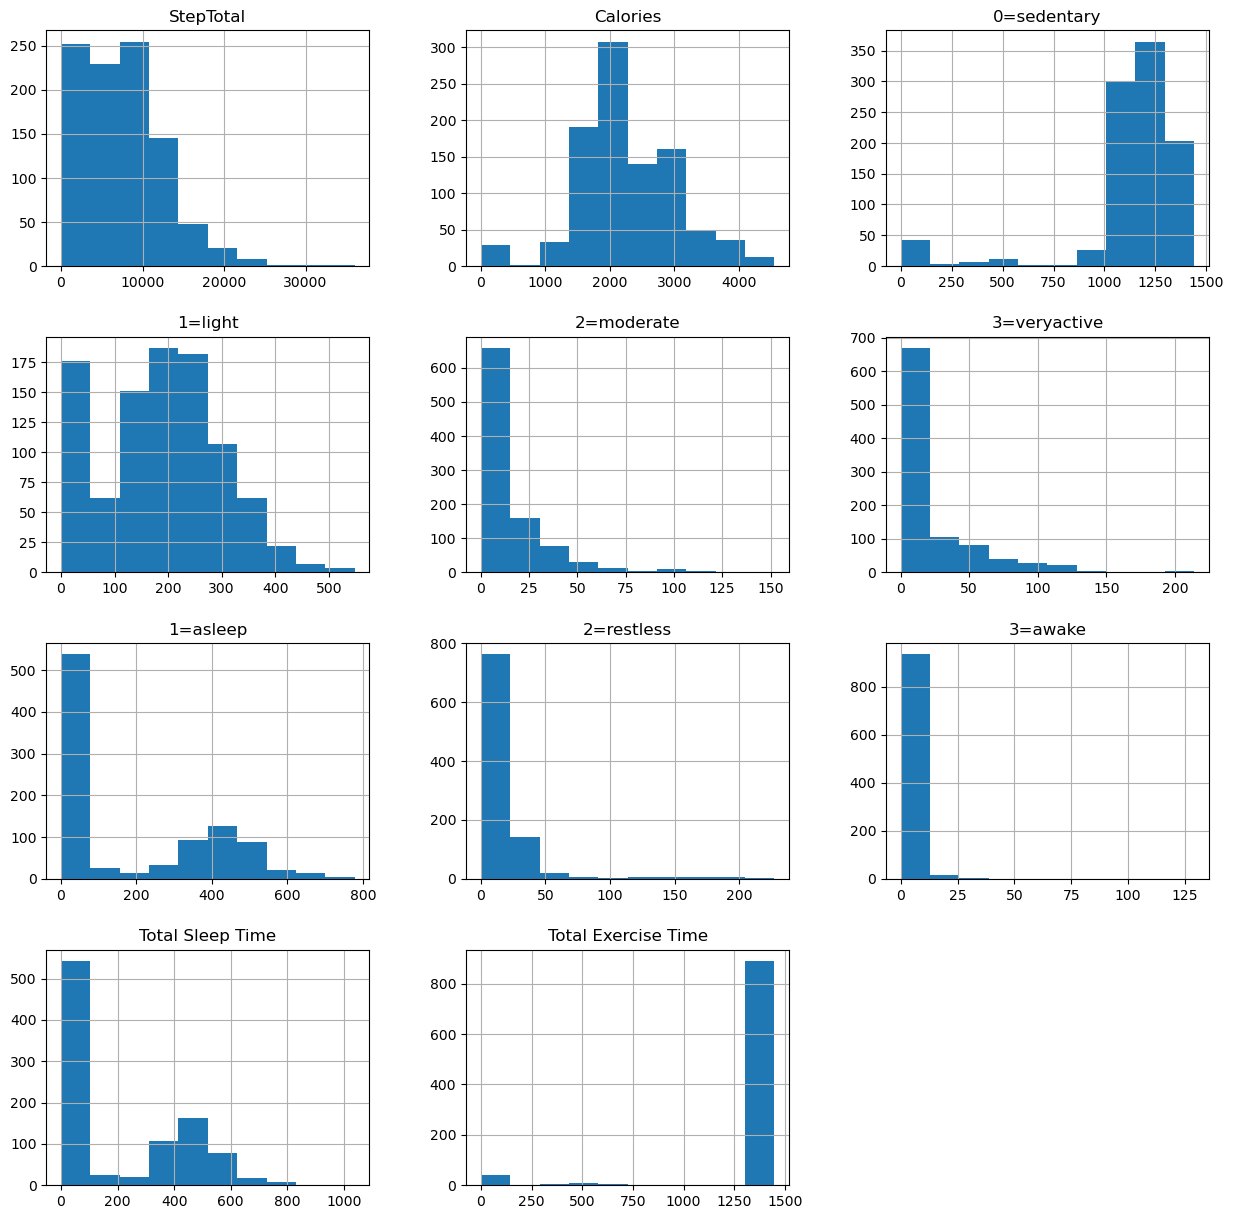

In [23]:
df_daily_sleep.hist(figsize=(15,15))
plt.show()

In [24]:
# of the people who regularly track sleep data, remove any nights of sleep with less than 3 recorded hours of sleep (180 mins)

#df_daily_sleep[df_daily_sleep["Total Sleep Time"]>=180]

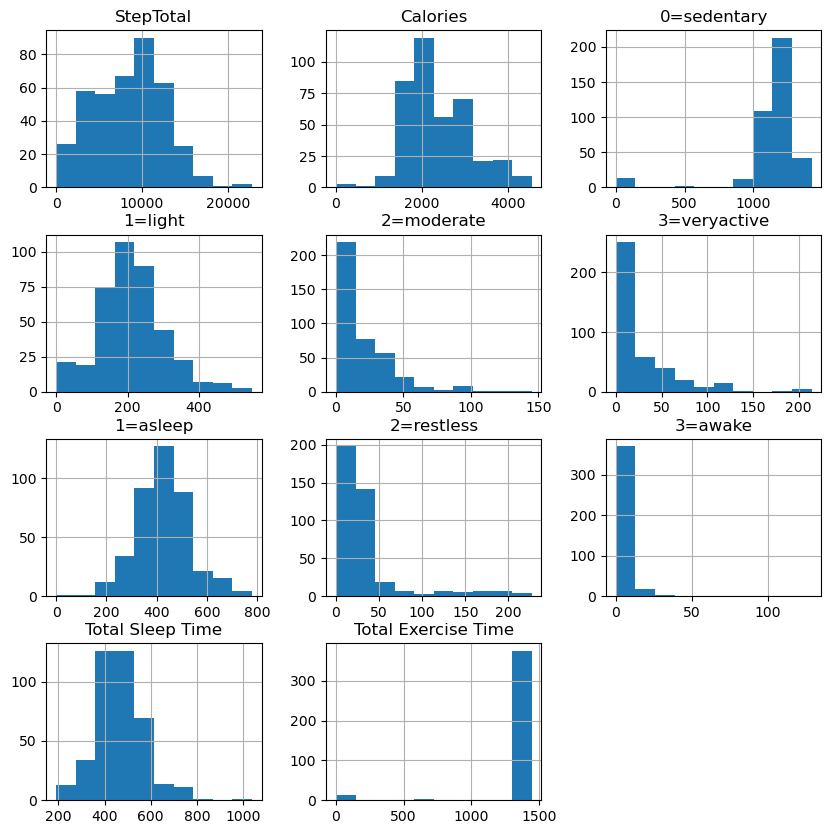

In [25]:
df_daily_sleep[df_daily_sleep["Total Sleep Time"]>=180].hist(figsize=(10,10))
plt.show()

In [26]:
df_daily_sleep['Good Sleep Percent'] = df_daily_sleep['1=asleep'] / df_daily_sleep['Total Sleep Time']
df_daily_sleep.head()

StepTotal  Calories  0=sedentary  1=light  \
ActivityDate Id                                                      
2016-04-11   1927972279          0         0            0        0   
             2026352035          0         0            0        0   
             4020332650          0         0            0        0   
             4702921684          0         0            0        0   
             5553957443          0         0            0        0   

                         2=moderate  3=veryactive  1=asleep  2=restless  \
ActivityDate Id                                                           
2016-04-11   1927972279           0             0       124           0   
             2026352035           0             0       162          29   
             4020332650           0             0       145          12   
             4702921684           0             0        49           2   
             5553957443           0             0        95           4   

                         3=awake  Total Sleep Time  Total Exercise Time  \
ActivityDate Id                                                           
2016-04-11   1927972279        0               124                    0   
             2026352035        1               192                    0   
             4020332650        6               163                    0   
             4702921684        0                51                    0   
             5553957443        1               100                    0   

                         Good Sleep Percent  
ActivityDate Id                              
2016-04-11   1927972279            1.000000  
             2026352035            0.843750  
             4020332650            0.889571  
             4702921684            0.960784  
             5553957443            0.950000

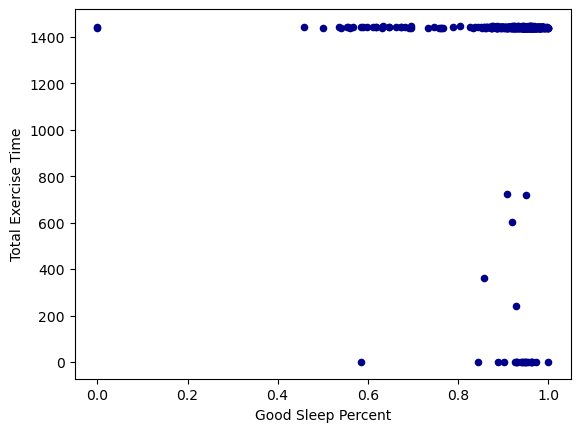

In [33]:
rel_plot = df_daily_sleep.plot.scatter(x='Good Sleep Percent',y='Total Exercise Time',c='DarkBlue')

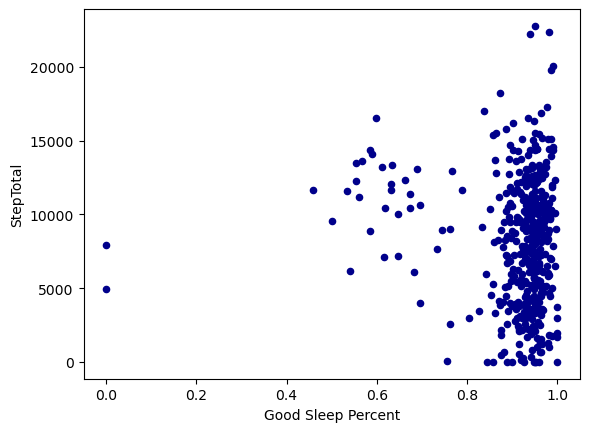

In [35]:
rel_plot = df_daily_sleep.plot.scatter(x='Good Sleep Percent',y='StepTotal',c='DarkBlue')

In [41]:
df_daily_sleep['Exercise Intensity'] = (
    (df_daily_sleep["0=sedentary"] * 0) + 
    (df_daily_sleep["1=light"] * 1) + 
    (df_daily_sleep["2=moderate"] * 2) + 
    (df_daily_sleep["3=veryactive"] * 3)
    ) / df_daily_sleep['Total Exercise Time']
df_daily_sleep.head()

StepTotal  Calories  0=sedentary  1=light  \
ActivityDate Id                                                      
2016-04-11   1927972279          0         0            0        0   
             2026352035          0         0            0        0   
             4020332650          0         0            0        0   
             4702921684          0         0            0        0   
             5553957443          0         0            0        0   

                         2=moderate  3=veryactive  1=asleep  2=restless  \
ActivityDate Id                                                           
2016-04-11   1927972279           0             0       124           0   
             2026352035           0             0       162          29   
             4020332650           0             0       145          12   
             4702921684           0             0        49           2   
             5553957443           0             0        95           4   

                         3=awake  Total Sleep Time  Total Exercise Time  \
ActivityDate Id                                                           
2016-04-11   1927972279        0               124                    0   
             2026352035        1               192                    0   
             4020332650        6               163                    0   
             4702921684        0                51                    0   
             5553957443        1               100                    0   

                         Good Sleep Percent  Exercise Intensity  
ActivityDate Id                                                  
2016-04-11   1927972279            1.000000                 NaN  
             2026352035            0.843750                 NaN  
             4020332650            0.889571                 NaN  
             4702921684            0.960784                 NaN  
             5553957443            0.950000                 NaN

In [42]:
df_daily_sleep.describe()

,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time,Good Sleep Percent,Exercise Intensity
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,449.000000,919.000000
mean,7370.162500,2241.822917,1134.990625,184.207292,14.080208,21.087500,179.666667,14.607292,2.102083,196.376042,1354.365625,0.912343,0.201156
std,5178.945075,779.029277,293.507214,114.779799,20.762795,32.991019,217.166648,31.353129,7.133174,235.511617,325.298109,0.107672,0.117260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3412.750000,1789.500000,1105.000000,111.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1440.000000,0.910369,0.121278
50%,7195.500000,2105.000000,1180.000000,194.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1441.000000,0.942708,0.211512
75%,10621.000000,2767.000000,1268.250000,258.000000,20.000000,32.000000,398.000000,19.000000,2.000000,429.250000,1442.000000,0.960825,0.279917
max,36019.000000,4551.000000,1440.000000,548.000000,152.000000,214.000000,778.000000,227.000000,129.000000,1038.000000,1448.000000,1.000000,0.635107


Maybe we can fill in nulls with the person's average daily exercise intensity?

In [34]:
df_daily_sleep.to_csv("test_output.csv")

In [28]:
df_clean = df_daily_sleep[df_daily_sleep["Total Sleep Time"]>=180]

df_clean.describe()

,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time,Good Sleep Percent
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,8463.010127,2364.926582,1123.632911,211.691139,18.881013,25.468354,425.174684,34.508861,4.840506,464.524051,1379.673418,0.914483
std,4087.677978,762.556901,245.998317,94.239251,22.851841,36.541276,105.019952,41.158130,10.409503,105.908141,284.716195,0.101289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,0.000000,0.000000
25%,5238.500000,1829.000000,1112.500000,154.500000,1.000000,1.000000,360.500000,15.000000,1.000000,402.000000,1441.000000,0.913198
50%,8911.000000,2193.000000,1169.000000,206.000000,12.000000,9.000000,423.000000,22.000000,3.000000,456.000000,1442.000000,0.943627
75%,11252.500000,2896.500000,1217.000000,261.500000,28.500000,36.500000,486.000000,33.000000,5.000000,525.500000,1443.000000,0.961529
max,22770.000000,4551.000000,1423.000000,548.000000,145.000000,214.000000,778.000000,227.000000,129.000000,1038.000000,1448.000000,1.000000


In [29]:
df_clean

StepTotal  Calories  0=sedentary  1=light  \
ActivityDate Id                                                      
2016-04-11   2026352035          0         0            0        0   
2016-04-12   1503960366      13158      1988            0        0   
             1927972279        678      2195            0        0   
             2026352035       4414      1460            0        0   
             3977333714       8856      1450            0        0   
...                            ...       ...          ...      ...   
2016-05-12   4702921684       2752      1220         1151      261   
             5553957443       3121       716          538       48   
             6962181067       3569       925         1194      238   
             7086361926       1032       995         1187      172   
             8378563200       4056      1857         1276      150   

                         2=moderate  3=veryactive  1=asleep  2=restless  \
ActivityDate Id                                                           
2016-04-11   2026352035           0             0       162          29   
2016-04-12   1503960366           0             0       327          13   
             1927972279           0             0       626          24   
             2026352035           0             0       504          33   
             3977333714           0             0       274         182   
...                             ...           ...       ...         ...   
2016-05-12   4702921684          16            14       330          34   
             5553957443           6             9       316          25   
             6962181067          10             0       465          14   
             7086361926          20            64       399           7   
             8378563200           7            11       361          31   

                         3=awake  Total Sleep Time  Total Exercise Time  \
ActivityDate Id                                                           
2016-04-11   2026352035        1               192                    0   
2016-04-12   1503960366        6               346                    0   
             1927972279        1               651                    0   
             2026352035        5               542                    0   
             3977333714       13               469                    0   
...                          ...               ...                  ...   
2016-05-12   4702921684        0               364                 1442   
             5553957443        3               344                  601   
             6962181067        2               481                 1442   
             7086361926        0               406                 1443   
             8378563200        3               395                 1444   

                         Good Sleep Percent  
ActivityDate Id                              
2016-04-11   2026352035            0.843750  
2016-04-12   1503960366            0.945087  
             1927972279            0.961598  
             2026352035            0.929889  
             3977333714            0.584222  
...                                     ...  
2016-05-12   4702921684            0.906593  
             5553957443            0.918605  
             6962181067            0.966736  
             7086361926            0.982759  
             8378563200            0.913924  

[395 rows x 12 columns]

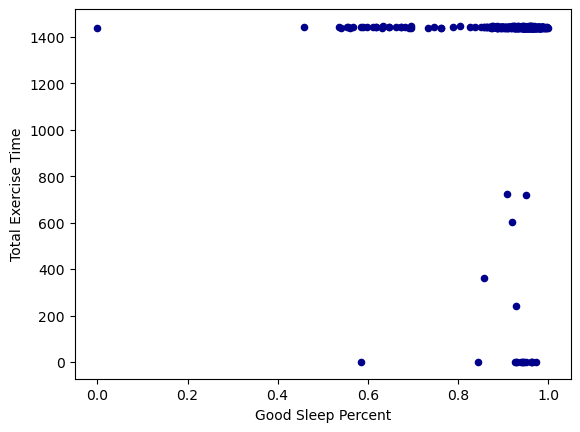

In [36]:
rel_plot = df_clean.plot.scatter(x='Good Sleep Percent',y='Total Exercise Time',c='DarkBlue')

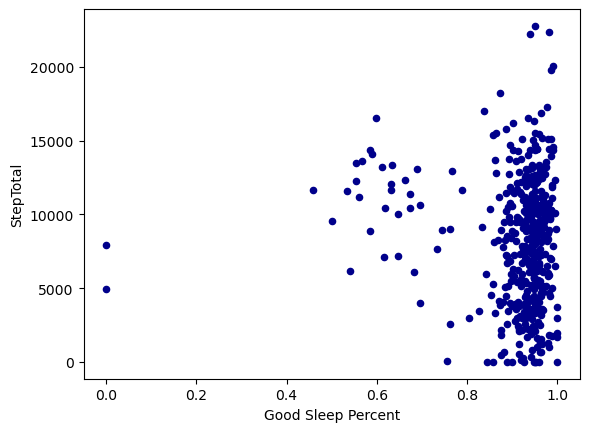

In [37]:
rel_plot = df_daily_sleep.plot.scatter(x='Good Sleep Percent',y='StepTotal',c='DarkBlue')

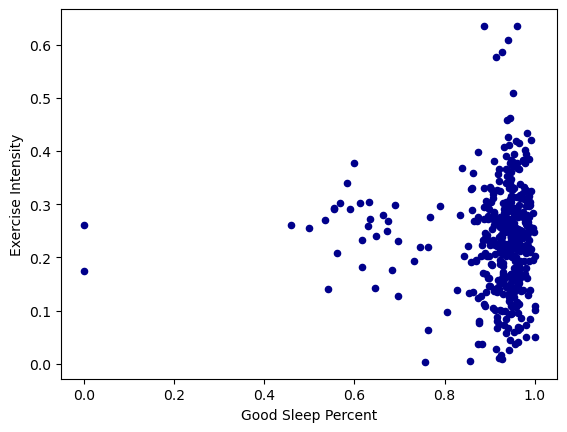

In [43]:
rel_plot = df_daily_sleep.plot.scatter(x='Good Sleep Percent',y='Exercise Intensity',c='DarkBlue')

In [47]:
df_participant = df_daily_sleep.groupby(["Id"]).mean()
df_participant.head()

,StepTotal,Calories,0=sedentary,1=light,2=moderate,3=veryactive,1=asleep,2=restless,3=awake,Total Sleep Time,Total Exercise Time,Good Sleep Percent,Exercise Intensity
Id,,,,,,,,,,,,,
1503960366,12082.129032,1815.709677,1123.516129,209.741935,19.709677,40.838710,290.548387,16.129032,2.354839,309.032258,1393.806452,0.936554,0.266462
1624580081,5554.687500,1436.875000,1205.468750,147.375000,7.093750,9.812500,0.000000,0.000000,0.000000,0.000000,1369.750000,NaN,0.137118
1644430081,7264.233333,2804.166667,1170.466667,168.366667,20.433333,10.266667,39.200000,2.433333,4.500000,46.133333,1369.533333,0.848050,0.173219
1844505072,2498.187500,1521.281250,1254.875000,101.250000,1.343750,0.406250,61.125000,19.500000,9.468750,90.093750,1357.875000,0.466528,0.075348
1927972279,860.606061,2040.818182,1288.909091,34.575758,1.000000,1.575758,63.181818,2.909091,0.242424,66.333333,1326.060606,0.948358,0.030500


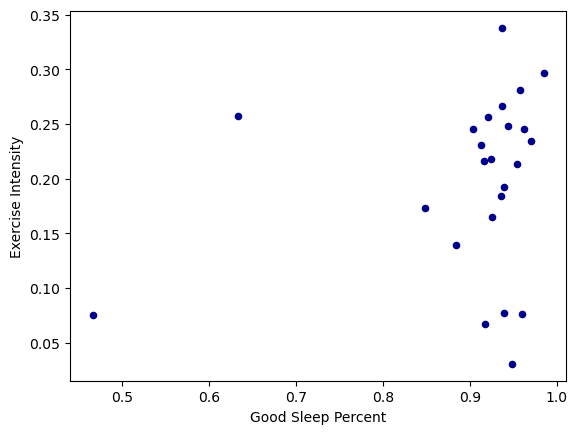

In [48]:
rel_plot = df_participant.plot.scatter(x='Good Sleep Percent',y='Exercise Intensity',c='DarkBlue')

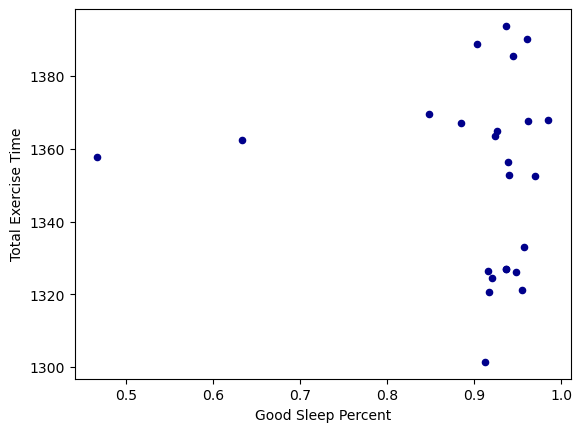

In [49]:
rel_plot = df_participant.plot.scatter(x='Good Sleep Percent',y='Total Exercise Time',c='DarkBlue')